# Zadanie 2 Pracownia Specjalistyczna - Eksploracja danych
### Krzysztof Funkowski

In [1]:
from math import *
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Zadania
- Budowanie macierzy kowariancji &Sigma;k dla poszczególnych zbiorów uczących Ck = {xj} w 
  danych Irys (k = 1, 2, 3).
- Implementacja iteracyjnej procedury rozwiązywania zagadnienia własnego.
- Wyznaczenie wartości własnych &chi;i i wektorów własnych ki dla wybranej macierzy 
  kowariancji &Sigma;k.
- Zwizualizować wektory cech xj na płaszczyznę rozpiętą przez dwa wektory własne ki

### Funkcja służąca do obliczania kowariancji dla dwóch wektorów

In [2]:
def cov(x, y, x_avg, y_avg):
    elements_count = len(x) # ilość elementów w tablicy
    elements_sum = 0
    
    for x,y in zip(x,y):
        elements_sum = elements_sum + ((x - x_avg)*(y - y_avg)) # sumowanie (x - średnia_arytmetyczna_x) * (y - średnia_arytmetyczna_y)
    
    return elements_sum / elements_count # suma dzielona przez liczbę elementów

### Funkcja obliczająca macierz kowariancji dla zbioru danych

In [3]:
def cov_for_dataset(cov_dataset):
    avgs = []
    matrix_shape = cov_dataset.shape[1] # wymiary_macierzy czyli liczba_kolumn_bioru_danych x liczba_kolumn_bioru_danych
    for i in range(matrix_shape):
        avgs.append(cov_dataset[:,i].mean()) # obliczanie średnich dla każdego parametru
    
    matrix = []
    for i in range(matrix_shape):
        matrix_row = []
        for j in range(matrix_shape):
            #matrix_shape*i + j
            res = cov(cov_dataset[:,i],cov_dataset[:,j],avgs[i], avgs[j]) # wyznaczanie kowariancji dla każdej pary parametrów
            matrix_row.append(res) # budowanie wiersza macierzy
        matrix.append(matrix_row) # dodawanie wiersza macierzy do tablicy bazowej
    
    return np.matrix(matrix) # przekształcanie typu tablicy na macierz

### Funkcja do obliczania długości wektora własnego

In [4]:
def eigenvector_len(v1):
    dims = v1.shape[0] # ilość elementów wektora
    length = 0
    
    for i in range(dims):
        val = v1[i].ravel().tolist()[0][0]
        length = length + pow(val,2) # sumowanie elementów podniesionych do kwadratu
        
    
    length = sqrt(length) # pierwiastkowanie wyniku sumy elementów wektora podniesionych do kwadratów
    
    return length # zwracanie długości

### Funkcja normalizująca, zwracająca wartość własną i wektor własny

In [5]:
def eigenvector_normalization(v1):
    eigenvalue = eigenvector_len(v1) # wylicznaie wartości własnej
    eigenvector = v1 / eigenvalue # wyliczanie wektora własnego
    
    return eigenvalue, eigenvector # zwrócenie wartości własnej i wektora własnego

### Pomocnicza funkcja zmieniająca tablicę wektorów własnych w odpowiednią formę macierzy

In [6]:
def rearrange_matrix(eigenvectors):
    res = []

    for i in range(len(eigenvectors)):
        row = eigenvectors[i].ravel().tolist()[0]
        res.append(row)

    return np.matrix(res).T

### Funkcja odpowiadająca za obliczanie wartości własnych i wektorów własnych

In [8]:
def eigenvalues_eigenvectors(matrix, num_iterations):
    n = matrix.shape[0] # jeden z wymiarów macierzy, ponieważ jest kwadratowa to wystarczy tylko jeden
    eigenvalues = [] # lista na wartości własne
    eigenvectors = [] # lista na wektory własne
    
    for i in range(n):
        # losowe dane wektora na początku
        eigenvector = np.random.rand(n,1)
    
        # algorytm iteracyjny wykonywany num_iterations razy
        for _ in range(num_iterations):
            eigenvector = np.dot(matrix, eigenvector) # mnożenie macierzy kowariancji przez wektor 
            eigenvalue, eigenvector = eigenvector_normalization(eigenvector) # normalizacja wektora
            
        # usuwanie z macierzy znalezionej wartości własnej i wektora własnego
        # marix - wartość własna * iloczyn zewnętrzny wektora własnego
        matrix = matrix - eigenvalue * np.multiply(eigenvector,eigenvector.T).T 
        
        '''if i % 2 == 0:
            matrix = matrix - eigenvalue * np.multiply(eigenvector,eigenvector.T).T
        else:
            eigenvector = eigenvector * -1
            matrix = matrix - eigenvalue * np.multiply(eigenvector,eigenvector.T).T'''
        
        eigenvalues.append(eigenvalue) # dodanie znalezionej wartości własnej do listy
        eigenvectors.append(eigenvector) # dodanie znalezionego wektora własnego do listy
        
        
        
    return eigenvalues, rearrange_matrix(eigenvectors) # zwrócenie wartości własnych i wektorów własnych

### Funkcja do rysowania projekcji

In [9]:
def draw_plot(datasets):
    colors = ['red','blue','green']
    
    print(len(datasets))
    
    # dla każdego zbioru danych z danej kategorii
    for i in range(len(datasets)):
        # przejście po wszystkich punktach
        for j in range(datasets[i][1].shape[0]):
            if j==0:
                # zaznaczanie punktu dla pierwszego (SepalLengthCm) i drugiego (SepalWidthCm) parametru
                plt.scatter(datasets[i][1][j,0],datasets[i][1][j,1], color=colors[i], label=datasets[i][0]) 
            else:
                # zaznaczanie punktu dla pierwszego (SepalLengthCm) i drugiego (SepalWidthCm) parametru
                plt.scatter(datasets[i][1][j,0],datasets[i][1][j,1], color=colors[i])
    
    plt.grid()
    plt.legend()
    plt.show() 

### Wczytanie zbioru Irisa i konwersja na dataframe'a

In [1]:
df = pd.read_csv('Iris.csv', sep=',', index_col=0)
dataset = df.to_numpy()
df

NameError: name 'pd' is not defined

### Wyodrębnienie parametrów ze zbioru

In [9]:
cov_dataset = np.array(dataset[:,[0,1,2,3]], dtype='double')
cov_dataset

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Macierz kowariancji dla zbioru Irisa

In [10]:
cov_matrix = cov_for_dataset(cov_dataset)
cov_matrix

matrix([[ 0.68112222, -0.03900667,  1.26519111,  0.51345778],
        [-0.03900667,  0.18675067, -0.319568  , -0.11719467],
        [ 1.26519111, -0.319568  ,  3.09242489,  1.28774489],
        [ 0.51345778, -0.11719467,  1.28774489,  0.57853156]])

### Występujące gatunki w zbiorze danych

In [11]:
species = np.array(list(set(dataset[:,4])))
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

### Wartości własne i wektory własne na podstawie macierzy kowariancji

In [12]:
num_iterations = 10000
eigenvalues, eigenvectors = eigenvalues_eigenvectors(cov_matrix, num_iterations)

print(f"Wartość własna:\n {eigenvalues}")
print(f"Wektor własny:\n {eigenvectors}")

Wartość własna:
 [4.1966751631979795, 0.24062861448333192, 0.07800041537352695, 0.0235251402784947]
Wektor własny:
 [[ 0.36158968  0.65653988 -0.58099728  0.31725455]
 [-0.08226889  0.72971237  0.59641809 -0.32409435]
 [ 0.85657211 -0.1757674   0.07252408 -0.47971899]
 [ 0.35884393 -0.07470647  0.54906091  0.75112056]]


### Wartości własne i wektory własne wygenerowane przez gotowe narzędzie z biblioteki NumPy w celu sprawdzenia poprawności wyników

In [13]:
# porównanie wyników metody zaimplementowanej w domu z gotową z biblioteki NumPy
eigenvalues2, eigenvectors2 = np.linalg.eig(cov_matrix)
eigenvalues2, eigenvectors2

(array([4.19667516, 0.24062861, 0.07800042, 0.02352514]),
 matrix([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
         [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
         [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
         [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]]))

### Dla każdego gatunku wyznaczanie macierzy kowariancji, następnie wyznaczanie na jej podstawie wartości własnych i wektorów własnych. Kolejno projekcja pierwszych dwóch parametrów (SepalLengthCm, SepalWidthCm) zbioru danych dla gatunków rozpiętych na dwa pierwsze wektory własne "badanego" w danym momencie gatunku.

Iris-setosa: 
 macierz cov:
[[0.121764 0.098292 0.015816 0.010336]
 [0.098292 0.142276 0.011448 0.011208]
 [0.015816 0.011448 0.029504 0.005584]
 [0.010336 0.011208 0.005584 0.011264]] 

 wartości własne: [0.2337492578217779, 0.035534325601655904, 0.026312230196171977, 0.009212186380394142]
 wektory własne:
[[ 0.6662063   0.60592481 -0.43470033 -0.00773998]
 [ 0.73635931 -0.61961464  0.26584674 -0.05637529]
 [ 0.09478706  0.49163428  0.83463886 -0.22954109]
 [ 0.07042406  0.08502085  0.20913895  0.97163409]] 

 dwa pierwsze wektory własne:
 [[ 0.6662063   0.60592481]
 [ 0.73635931 -0.61961464]
 [ 0.09478706  0.49163428]
 [ 0.07042406  0.08502085]]

3


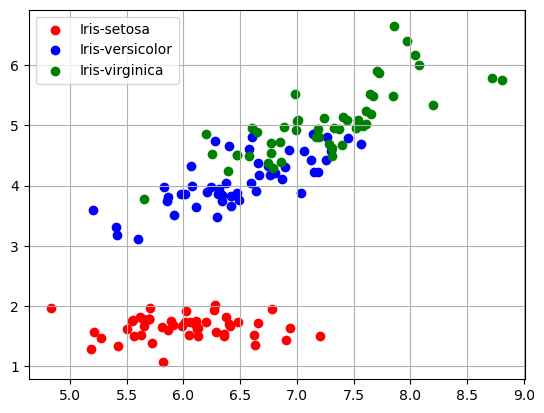

Iris-versicolor: 
 macierz cov:
[[0.261104 0.08348  0.17924  0.054664]
 [0.08348  0.0965   0.081    0.04038 ]
 [0.17924  0.081    0.2164   0.07164 ]
 [0.054664 0.04038  0.07164  0.038324]] 

 wartości własne: [0.4781164652566476, 0.07093641392609654, 0.05368056334125243, 0.009594557476003636]
 wektory własne:
[[ 0.68672376 -0.66908906  0.26508336  0.1022796 ]
 [ 0.30534703  0.56746531  0.72961786 -0.22891939]
 [ 0.62366312  0.34332698 -0.62716496 -0.31596679]
 [ 0.21498369  0.33530513 -0.06366081  0.91504087]] 

 dwa pierwsze wektory własne:
 [[ 0.68672376 -0.66908906]
 [ 0.30534703  0.56746531]
 [ 0.62366312  0.34332698]
 [ 0.21498369  0.33530513]]

3


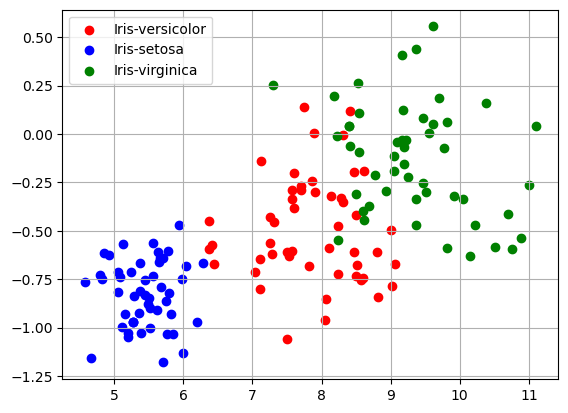

Iris-virginica: 
 macierz cov:
[[0.396256 0.091888 0.297224 0.048112]
 [0.091888 0.101924 0.069952 0.046676]
 [0.297224 0.069952 0.298496 0.047848]
 [0.048112 0.046676 0.047848 0.073924]] 

 wartości własne: [0.6813497414608959, 0.10442020142375677, 0.05124951922482228, 0.03358053789052519]
 wektory własne:
[[ 0.74101679 -0.16525895 -0.53445017  0.37141165]
 [ 0.20328772  0.74864279 -0.3253749  -0.54068405]
 [ 0.62789179 -0.16942776  0.65152357 -0.39059336]
 [ 0.12377451  0.61928804  0.4289653   0.64587225]] 

 dwa pierwsze wektory własne:
 [[ 0.74101679 -0.16525895]
 [ 0.20328772  0.74864279]
 [ 0.62789179 -0.16942776]
 [ 0.12377451  0.61928804]]

3


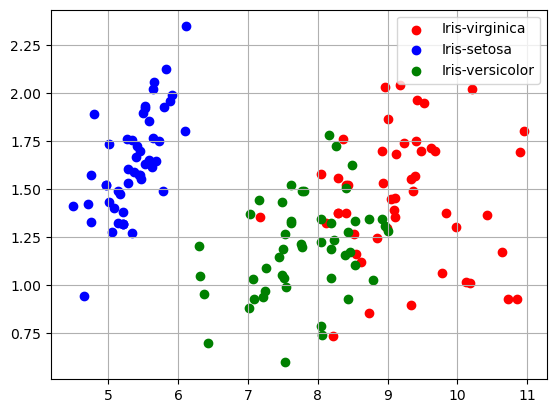

In [20]:
# dla każdego gatunku
for s in species:
    current_datasets = [] # lista w której będą zbiory do rysowania
    current_species_dataset = df[df['Species'].str.contains(s)].to_numpy() # wybieranie danych tylko dla badanego gatunku
    current_species_dataset = current_species_dataset[:, [0, 1, 2, 3]] # wybranie parametrów ze zbioru danych
    
    num_iterations = 10000 # ustalenie liczby iteracji
    current_cov_matrix = cov_for_dataset(current_species_dataset) # macierz kowariancji dla głównego w tym momencie gatunku
    # wartości własne i wektory własne dla badanego gatunku
    current_eigenvalues, current_eigenvectors = eigenvalues_eigenvectors(current_cov_matrix,num_iterations)
    print(f'{s}: \n macierz cov:\n{current_cov_matrix} \n\n wartości własne: {current_eigenvalues}\n wektory własne:\n{current_eigenvectors} \n\n dwa pierwsze wektory własne:\n {current_eigenvectors[:,:2]}\n')
    projection = current_species_dataset * current_eigenvectors[:,:2] # projekcja zbioru danych rozpiętego na dwa pierwsze wektory własne
    current_datasets.append((s,projection)) # dodanie do listy do rysowania
    
    other_species = species[species!=s] # wyznaczenie zbioru gatunków które nie są aktualnym badanym
    # dla każdego gatunku który nie jest aktualnie badanym / nie jest głównym w danej iteracji
    for os in other_species:
        other_species_dataset = df[df['Species'].str.contains(os)].to_numpy() # wybieranie danych tylko dla niegłównego gatunku
        other_species_dataset = other_species_dataset[:, [0, 1, 2, 3]] # wybranie parametrów ze zbioru danych
        
        # projekcja zbioru danych dla gatunku innego niż główny w danej iteracji, rozpiętego na dwa pierwsze wektory własne
        other_projection = other_species_dataset * current_eigenvectors[:,:2] 
        current_datasets.append((os,other_projection)) # dodanie do listy do rysowania
        
    draw_plot(current_datasets) # rysowanie projekcji